In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
#from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
years1 = [f"{x:04d}" for x in range(150,500,10)]
years2 = [f"{x:04d}" for x in range(159,500,10)]
i =0
result = np.zeros((4200))

In [3]:
    for yy,mm in zip(years1,years2):
   

        data=nc.Dataset('/Users/xiliangdiao/Downloads/dvidtt/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.dvidtt.'+yy+'01-'+mm+'12.nc')
        plotvar = data.variables['dvidtt'][:,247:365,800:1100]
        lont = data.variables['TLON']
        latt = data.variables['TLAT']
        #plotvar = plotvar[247:365,800:1100]
        #plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        result[i*120:(i+1)*120] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
years1

['0150',
 '0160',
 '0170',
 '0180',
 '0190',
 '0200',
 '0210',
 '0220',
 '0230',
 '0240',
 '0250',
 '0260',
 '0270',
 '0280',
 '0290',
 '0300',
 '0310',
 '0320',
 '0330',
 '0340',
 '0350',
 '0360',
 '0370',
 '0380',
 '0390',
 '0400',
 '0410',
 '0420',
 '0430',
 '0440',
 '0450',
 '0460',
 '0470',
 '0480',
 '0490']

In [5]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)

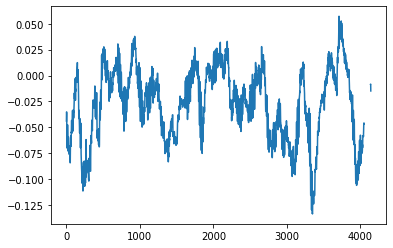

In [6]:
plt.plot(ww2)

In [7]:
qq = result.reshape(350,12)

In [8]:
rr = np.nanmean(qq,axis=1)

In [9]:
rr.shape

(350,)

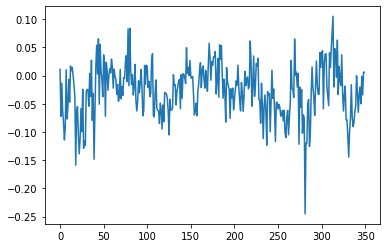

In [10]:
plt.plot(rr)

In [11]:
np.savetxt('dvirr2.out', rr)

In [12]:
ww2 = np.convolve(rr, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)

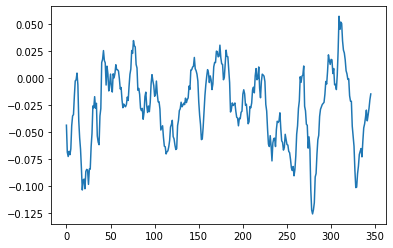

In [13]:
plt.plot(ww2)

(-17.5, 367.5, -0.1352359904400094, 0.06637531996695288)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


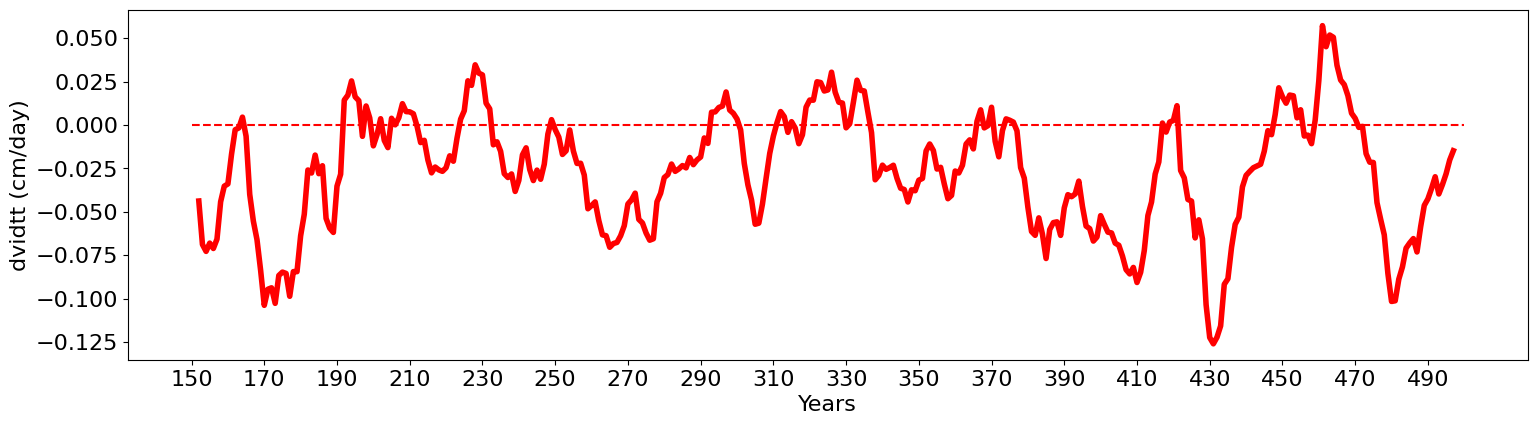

In [14]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#plt.vlines(noxx, mean, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, mean, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, mean, 0.000005, colors = "yellow",linewidth=3)
ax0.plot(t,ww2,'red',linewidth=4)
plt.hlines(0, 0, 350, colors = "red",linestyles = "dashed")
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('dvidtt (cm/day)',**my_font)
plt.axis("tight")

In [15]:
np.savetxt('dvi.out', ww2)